In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\ellaz\Downloads\soup_player_stats_new.csv")

In [2]:
data

,Unnamed: 0,NAME,CLUB,POSITION,HEIGHT,FOOT,AGE,RATING
0,0,Lionel Messi,Paris Saint-Germain,"AM,F(RC)",170,Left,34,98
1,1,Robert Lewandowski,Bayern München,F(C),184,Right,33,97
2,2,Kylian Mbappé,Paris Saint-Germain,"AM(RL),F(RLC)",178,Right,23,96
3,3,Júnior Neymar,Paris Saint-Germain,"AM,F(RLC)",174,Both,30,96
4,4,Mohamed Salah,Liverpool,"AM(R),F(RC)",175,Left,29,96
...,...,...,...,...,...,...,...,...
96,96,Jordi Alba,Barcelona,"D,DM,M(L)",170,Left,33,92
97,97,Matthijs de Ligt,Juventus,D(C),189,Both,22,92
98,98,Milan Skriniar,Internazionale,D(C),186,Right,27,92
99,99,Aymeric Laporte,Manchester City,D(LC),191,Left,27,92


In [3]:
f1 = data["FOOT"] == "Left"
f2 = data["FOOT"] == "Right"
f3 = data["FOOT"] == "Both"

In [9]:
# WE can see the division of top 100 footballers who give preference 
# to left foot by ratings
data[f1]["RATING"].value_counts()


92    9
94    5
93    4
98    1
96    1
Name: RATING, dtype: int64

In [11]:
# WE can see the division of top 100 footballers who give preference 
# to right foot by ratings
data[f2]["RATING"].value_counts()

92    25
93    16
94    11
95     4
96     3
97     1
Name: RATING, dtype: int64

In [12]:
# WE can see the division of top 100 footballers who give preference 
# to both feet by ratings
data[f3]["RATING"].value_counts()

92    12
93     3
96     2
95     2
94     2
Name: RATING, dtype: int64

In [21]:
# but if we want to know just how many are using left, right or both feet 
# as a percentage we can do as follows

# Left foot
data[f1]["FOOT"].count()/len(data)*100

19.801980198019802

In [22]:
# Right foot
data[f2]["FOOT"].count()/len(data)*100

59.4059405940594

In [23]:
# Both feet
data[f3]["FOOT"].count()/len(data)*100

20.792079207920793

In [ ]:
# So we can see that majority of top players are using their right foot more often

In [24]:
# what we can do now is basic clustering using K-means
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

In [26]:
data.head()

,Unnamed: 0,NAME,CLUB,POSITION,HEIGHT,FOOT,AGE,RATING
0,0,Lionel Messi,Paris Saint-Germain,"AM,F(RC)",170,Left,34,98
1,1,Robert Lewandowski,Bayern München,F(C),184,Right,33,97
2,2,Kylian Mbappé,Paris Saint-Germain,"AM(RL),F(RLC)",178,Right,23,96
3,3,Júnior Neymar,Paris Saint-Germain,"AM,F(RLC)",174,Both,30,96
4,4,Mohamed Salah,Liverpool,"AM(R),F(RC)",175,Left,29,96


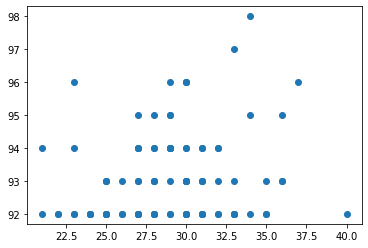

In [27]:
plt.scatter(data["AGE"], data["RATING"])

In [29]:
km = KMeans(n_clusters = 3)

In [30]:
km


KMeans(n_clusters=3)

In [32]:
y_predicted = km.fit_predict(data[["AGE","RATING"]])
y_predicted

array([0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1])

In [39]:
# when we predict number of columns we can see that there are 3 types of them - 0,1,2
# and we can look which player is related to which cluster
data["cluster"] = y_predicted
data

,Unnamed: 0,NAME,CLUB,POSITION,HEIGHT,FOOT,AGE,RATING,cluster
0,0,Lionel Messi,Paris Saint-Germain,"AM,F(RC)",170,Left,34,98,0
1,1,Robert Lewandowski,Bayern München,F(C),184,Right,33,97,0
2,2,Kylian Mbappé,Paris Saint-Germain,"AM(RL),F(RLC)",178,Right,23,96,2
3,3,Júnior Neymar,Paris Saint-Germain,"AM,F(RLC)",174,Both,30,96,1
4,4,Mohamed Salah,Liverpool,"AM(R),F(RC)",175,Left,29,96,1
...,...,...,...,...,...,...,...,...,...
96,96,Jordi Alba,Barcelona,"D,DM,M(L)",170,Left,33,92,0
97,97,Matthijs de Ligt,Juventus,D(C),189,Both,22,92,2
98,98,Milan Skriniar,Internazionale,D(C),186,Right,27,92,1
99,99,Aymeric Laporte,Manchester City,D(LC),191,Left,27,92,1


No handles with labels found to put in legend.


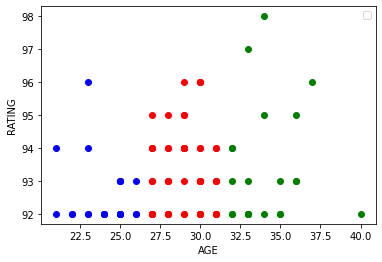

In [35]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]

plt.scatter(data1.AGE, data1["RATING"],color="green")
plt.scatter(data2.AGE, data2["RATING"],color="red")
plt.scatter(data3.AGE, data3["RATING"],color="blue")

plt.xlabel("AGE")
plt.ylabel("RATING")
plt.legend()

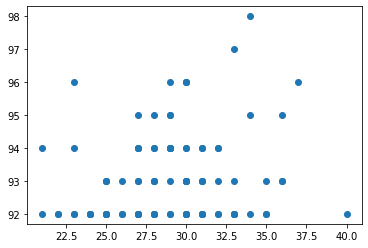

In [36]:
plt.scatter(data["AGE"], data["RATING"])

In [ ]:
# Now we can see that in comparison with our previous result
# the data was divided into 3 categories on the basis of Age
# Now we can definitely analyze our correlation between age and rating 

In [53]:
k_rng = range(1,10)
sse = []

In [54]:
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[["AGE","RATING"]])
    sse.append(km.inertia_)

C:\Users\ellaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
sse

[1567.7623762376231,
 697.785486443381,
 412.1303642010161,
 309.4097141521404,
 245.8554162312783,
 213.42159796724994,
 167.77330944917165,
 142.67436974789925,
 124.70963203463205]

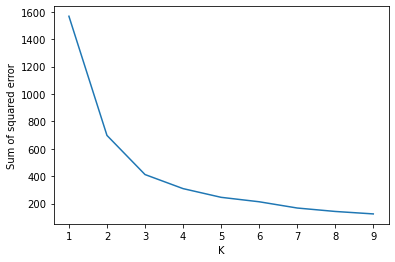

In [56]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)

In [ ]:
# Now we can see that even with elbow method the best number of clusters was 3 
# Now let's proceed to correlation test between age and rating


In [58]:
newData = data[["AGE","RATING"]]
newData

,AGE,RATING
0,34,98
1,33,97
2,23,96
3,30,96
4,29,96
...,...,...
96,33,92
97,22,92
98,27,92
99,27,92


In [59]:
# Now we can do a correlation test
newData.corr()

,AGE,RATING
AGE,1.00000,0.18969
RATING,0.18969,1.00000


In [ ]:
# We can see that the value is equa to 0.189~0.19
# Which means that the relation between these two variables 
# is not strong or even not medium level
# Basically meaning that there is no correlation between age and rating 
# of a football player

In [60]:
npArr1 = np.array(data["AGE"])
npArr2 = np.array(data["RATING"])

In [61]:
np.corrcoef(npArr1, npArr2)

array([[1.       , 0.1896896],
       [0.1896896, 1.       ]])